In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os

In [2]:
files = [file for file in os.listdir('nonneutral_mut_fig3/') if 'results' in file and 'infection' in file]

In [3]:
with open('nonneutral_mut_fig3/paramgrid_brateadv_Yvsu1.txt', 'rb') as f:
    param_grid = pickle.load(f)

In [4]:
all_results_noadv = {}
all_results_adv1perc = {}
all_results_adv5perc = {}

for file_name in files:
    
    with open('nonneutral_mut_fig3/'+file_name, 'rb') as f:
        file_result = pickle.load(f)
        
    param_index = int(file_name.split('_')[-1].split('.')[0])
    
    if param_grid[param_index]['adv'] == 1:
        all_results_noadv[(param_grid[param_index]['m'], param_grid[param_index]['a1'])] = file_result
        
    elif param_grid[param_index]['adv'] == 1.01:
        all_results_adv1perc[(param_grid[param_index]['m'], param_grid[param_index]['a1'])] = file_result
        
    elif param_grid[param_index]['adv'] == 1.05:
        all_results_adv5perc[(param_grid[param_index]['m'], param_grid[param_index]['a1'])] = file_result

In [5]:
def find_nearest_value(array):
    differences = np.array(array) - array[0]
    return(np.searchsorted(-differences, 0))

In [6]:
mvals = [10000,20000]
a1vals = np.array([7.76,8.07])
u_vals = np.logspace(-6,-3,100)
b = 7.61
a0=3

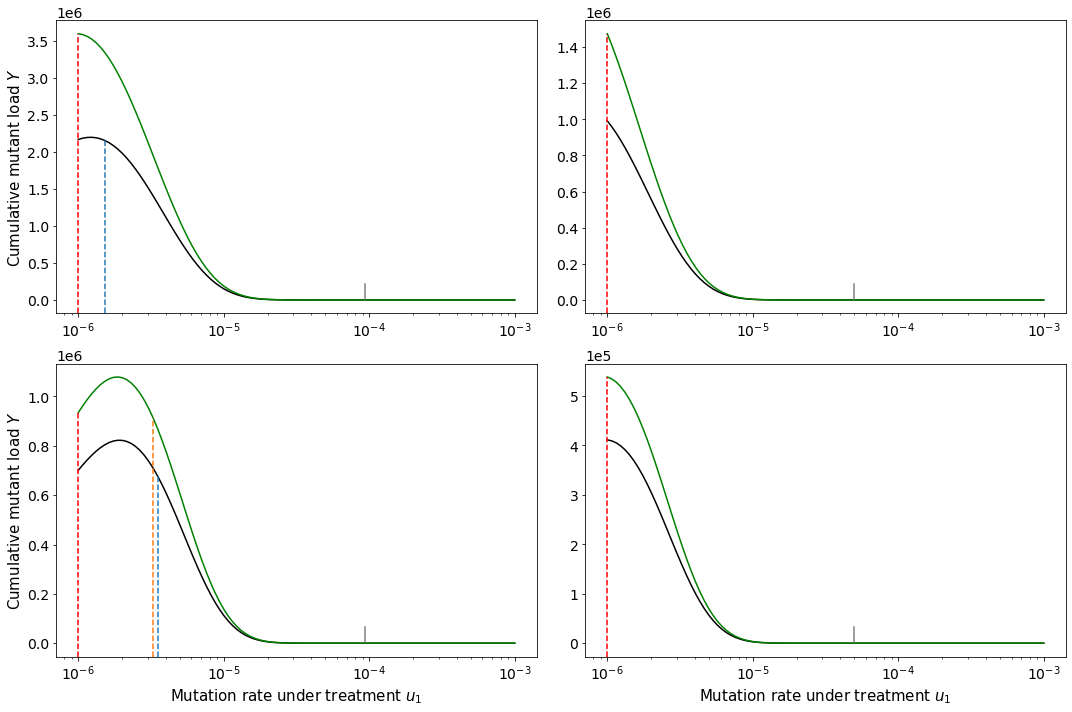

In [7]:
fig, ax = plt.subplots(2,2,figsize = (15,10))

for a1ind in range(2):
    for mind in range(2):
        ax[a1ind, mind].plot(u_vals, all_results_noadv[(mvals[mind], a1vals[a1ind])], c = 'k')
        ax[a1ind, mind].plot(u_vals, all_results_adv1perc[(mvals[mind], a1vals[a1ind])], c = 'green')
        #ax[a1ind, mind].plot(u_vals, all_results_adv5perc[(mvals[mind], a1vals[a1ind])], c = 'pink')
        ax[a1ind, mind].set_xscale('log')
        ax[a1ind, mind].tick_params(labelsize = 14)
        ax[a1ind, mind].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
        ax[a1ind, mind].yaxis.offsetText.set_fontsize(14)
        
        ylim_coor = ax[a1ind, mind].get_ylim()
        ax[a1ind, mind].axvline(1e-6, ymax = (all_results_adv1perc[(mvals[mind], a1vals[a1ind])][0]-ylim_coor[0])/(ylim_coor[1]-ylim_coor[0]), c='r', linestyle='dashed')
 
        nearest_noadv = find_nearest_value(all_results_noadv[(mvals[mind], a1vals[a1ind])])
        if nearest_noadv > 0:
            ax[a1ind, mind].axvline(u_vals[nearest_noadv], ymax = (all_results_noadv[(mvals[mind], a1vals[a1ind])][nearest_noadv]-ylim_coor[0])/(ylim_coor[1]-ylim_coor[0]), c='C0',linestyle='dashed')

        nearest_adv1 = find_nearest_value(all_results_adv1perc[(mvals[mind], a1vals[a1ind])])
        if nearest_adv1 > 0:
            ax[a1ind, mind].axvline(u_vals[nearest_adv1], ymax = (all_results_adv1perc[(mvals[mind], a1vals[a1ind])][nearest_adv1]-ylim_coor[0])/(ylim_coor[1]-ylim_coor[0]), c='C1',linestyle='dashed')

        error_threshold = np.searchsorted(-b*(1-u_vals)**mvals[mind] + a0, 0)
        ax[a1ind, mind].axvline(u_vals[error_threshold], ymax = 0.1, ymin = 0.05, c = 'grey')
    
#ax[0,0].legend(['No advantage', '1% advantage in birth rate'], fontsize = 16)
        
for i in range(2):
    ax[1,i].set_xlabel('Mutation rate under treatment $u_1$', fontsize = 15)
    ax[i,0].set_ylabel('Cumulative mutant load $Y$', fontsize = 15)
    
plt.tight_layout()
plt.savefig('cumulativemutantload_brateadv_exposure_FEB12.jpg', dpi=400, bbox_inches='tight')

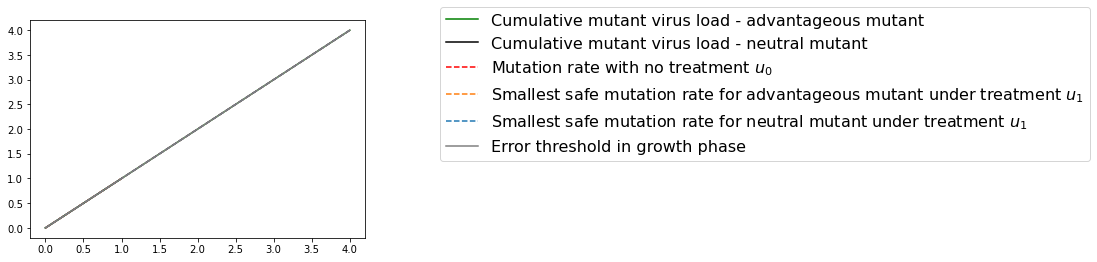

In [8]:
plt.plot(np.arange(5), np.arange(5), c = 'green')
plt.plot(np.arange(2), np.arange(2), c = 'k')
plt.plot(np.arange(5), np.arange(5), c = 'red', linestyle = 'dashed')
plt.plot(np.arange(2), np.arange(2), c = 'C1', linestyle = 'dashed')
plt.plot(np.arange(5), np.arange(5), c = 'C0', linestyle = 'dashed')
plt.plot(np.arange(5), np.arange(5), c = 'grey')


plt.legend(['Cumulative mutant virus load - advantageous mutant', 
            'Cumulative mutant virus load - neutral mutant', 
            'Mutation rate with no treatment $u_0$',
            'Smallest safe mutation rate for advantageous mutant under treatment $u_1$', 
            'Smallest safe mutation rate for neutral mutant under treatment $u_1$', 
            'Error threshold in growth phase'], bbox_to_anchor = (1.2,1.1), fontsize = 16)

plt.savefig('legend_advmutant_figure.jpg', dpi = 700, bbox_inches = 'tight')